## List of tables:

### 1. [Table 9: Treatment effects on quality](#quality)

#### Imports libraries

In [1]:
import matplotlib.pyplot as plt  # Plotting
import numpy as np  # Matrix algebra
import os  # File system handling
import pandas as pd  # Dataframe handling
import statsmodels.formula.api as smf  # Regressions analysis

from linearmodels.panel import RandomEffects  # Panel analysis
from linearmodels.panel.results import PanelModelComparison
from statsmodels.iolib.summary2 import summary_col  # Regression output table
from matplotlib.ticker import FuncFormatter  # Formating graphs

#### Set project directory

In [2]:
PROJECT_FOLDER = os.path.dirname(os.path.dirname(os.getcwd()))
FINAL_DATA_FOLDER = os.path.join(PROJECT_FOLDER, 'data', 'final')
TABLES_FOLDER = os.path.join(PROJECT_FOLDER, 'reports', 'tables')
FIGURES_FOLDER = os.path.join(PROJECT_FOLDER, 'reports', 'figures')

#### Set display format

In [3]:
pd.set_option("display.precision", 3)
pd.set_option("display.expand_frame_repr", False)
pd.set_option("display.max_rows", 40)

#### Set plotting style

In [4]:
plt.style.use('classic')

#### Set plotting properties 

In [5]:
bar_kw = dict(kind='bar', color='0.4', alpha=0.8, lw=0.5, width=0.7)
line_kw = dict(kind='line', lw=1, alpha=1, legend=True)
font_kw = dict(fontsize=11, color='k')
xlab_kw = dict(fontsize=11, labelpad=3)
ylab_kw = dict(fontsize=11, labelpad=3)
tick_kw = dict(
    size=5,
    which='both',
    direction='out',
    right=False,
    top=False,
    labelbottom=True
)

#### Retrieving dataframe

In [6]:
DATA = os.path.join(
    FINAL_DATA_FOLDER, 
    'experiment_2',                
    'data_final.feather'
)

df = pd.read_feather(DATA)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1768 entries, 0 to 1767
Columns: 596 entries, Age to Q110_timer
dtypes: datetime64[ns](2), float64(309), int64(26), object(259)
memory usage: 8.0+ MB


#### Define treatment index for ordering

In [7]:
treat_index = [
    'Neutral', 
    'Charisma without goal', 
    'Goal', 
    'Full charisma'
]

#### Reshape dataframe for panel analysis 

In [8]:
columns_to_keep = df.columns[[0, 1, 10, 13, 17, 22, 23, 27, 31, 45]]
columns_to_melt = [f'Q{x}_editratio' for x in range(1, df['Counter'].max() + 1)]

df_melted = pd.melt(
    df, 
    id_vars=columns_to_keep,
    value_vars=columns_to_melt,
    var_name='Question_number',
    value_name='Edit_ratio'
)

df_melted = df_melted.dropna(axis=0, how='any')
df_melted['Question_number'] = df_melted['Question_number'].str.extract(r'(\d+)').astype(int)

df_panel = df_melted.set_index(['Id', 'Question_number'])
df_panel = df_panel.sort_index()
df_panel.info()  

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 51868 entries, (0, 1) to (1798, 30)
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            51868 non-null  int64  
 1   Charisma       51868 non-null  int64  
 2   Diverse        51868 non-null  int64  
 3   Education      51868 non-null  int64  
 4   Female         51868 non-null  int64  
 5   Goal           51868 non-null  int64  
 6   Group          51868 non-null  int64  
 7   Mobile_device  51868 non-null  float64
 8   Treatment_str  51868 non-null  object 
 9   Edit_ratio     51868 non-null  float64
dtypes: float64(2), int64(7), object(1)
memory usage: 4.2+ MB


#### Table 4: Treatment effects on quality <a id='quality'></a> 

In [9]:
regs = {}
regs['re1'] = 'Edit_ratio ~ 1 + Charisma * Goal'
regs['re2'] = regs['re1'] + ' + Age + Female + Diverse + Education + Mobile_device'
regs['re3'] = regs['re2'] + ' + C(Group)'

re_results = [
    RandomEffects.from_formula(formula=v, data=df_panel).fit(cov_type='robust')
    for k, v in regs.items()
]

re_qual = PanelModelComparison(re_results, precision='std_errors', stars=True)

path = os.path.join(
    TABLES_FOLDER, 
    'experiment_2',    
    're_quality.tex'
)

with open(path, "w") as latex:
    latex.write(re_qual.summary.as_latex())

re_qual

,Model 0,Model 1,Model 2
Dep. Variable,Edit_ratio,Edit_ratio,Edit_ratio
Estimator,RandomEffects,RandomEffects,RandomEffects
No. Observations,51868,51868,51868
Cov. Est.,Robust,Robust,Robust
R-squared,0.0028,0.0044,0.0051
R-Squared (Within),0.0000,0.0000,0.0000
R-Squared (Between),0.0004,0.0467,0.0662
R-Squared (Overall),-0.0036,0.0030,0.0068
F-statistic,48.993,28.496,11.967
P-value (F-stat),0.0000,0.0000,0.0000


#### Average edit ratio per fragment, by treatment 

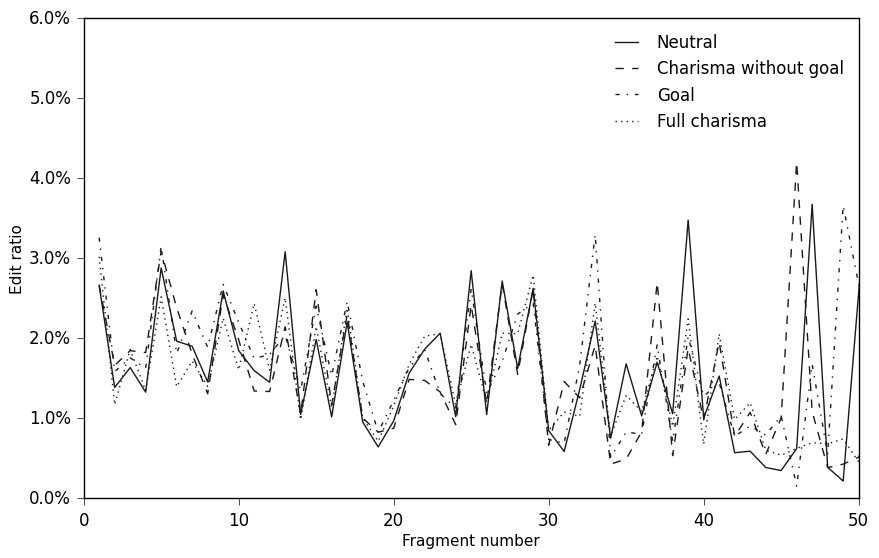

In [10]:
df_edit_ratio = df_panel\
    .groupby(['Treatment_str', 'Question_number'])\
    ['Edit_ratio']\
    .mean()\
    .unstack(level=0)\
    .loc[:, treat_index]

fig, ax = plt.subplots(figsize=(10, 6), dpi=100, facecolor='w')
df_edit_ratio.plot(ax=ax, color='0.1', style=['-', '--', '-.', ':'])
ax.tick_params(**tick_kw)
ax.set_xlabel("Fragment number", **xlab_kw)
ax.set_ylabel("Edit ratio", **ylab_kw)
ax.set_ylim(0.0, .06) 
ax.set_xlim(0.0, 50)
ax.legend(frameon=False, fontsize='medium') 
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.1%}'))

path = os.path.join(
    FIGURES_FOLDER, 
    'experiment_2', 
    'error_rate.pdf'
)
fig.savefig(path, bbox_inches='tight')

#### Calculate the time averaged error score and merge resuts with cross-sectional dataframe

In [11]:
avg_edit_ratio = df_panel['Edit_ratio'].mean(level=0).to_frame(name='Avg_edit_ratio')
df = df.merge(avg_edit_ratio, left_on='Id', right_on='Id', validate='one_to_one')

#### Histogram of average error scores, by treatment

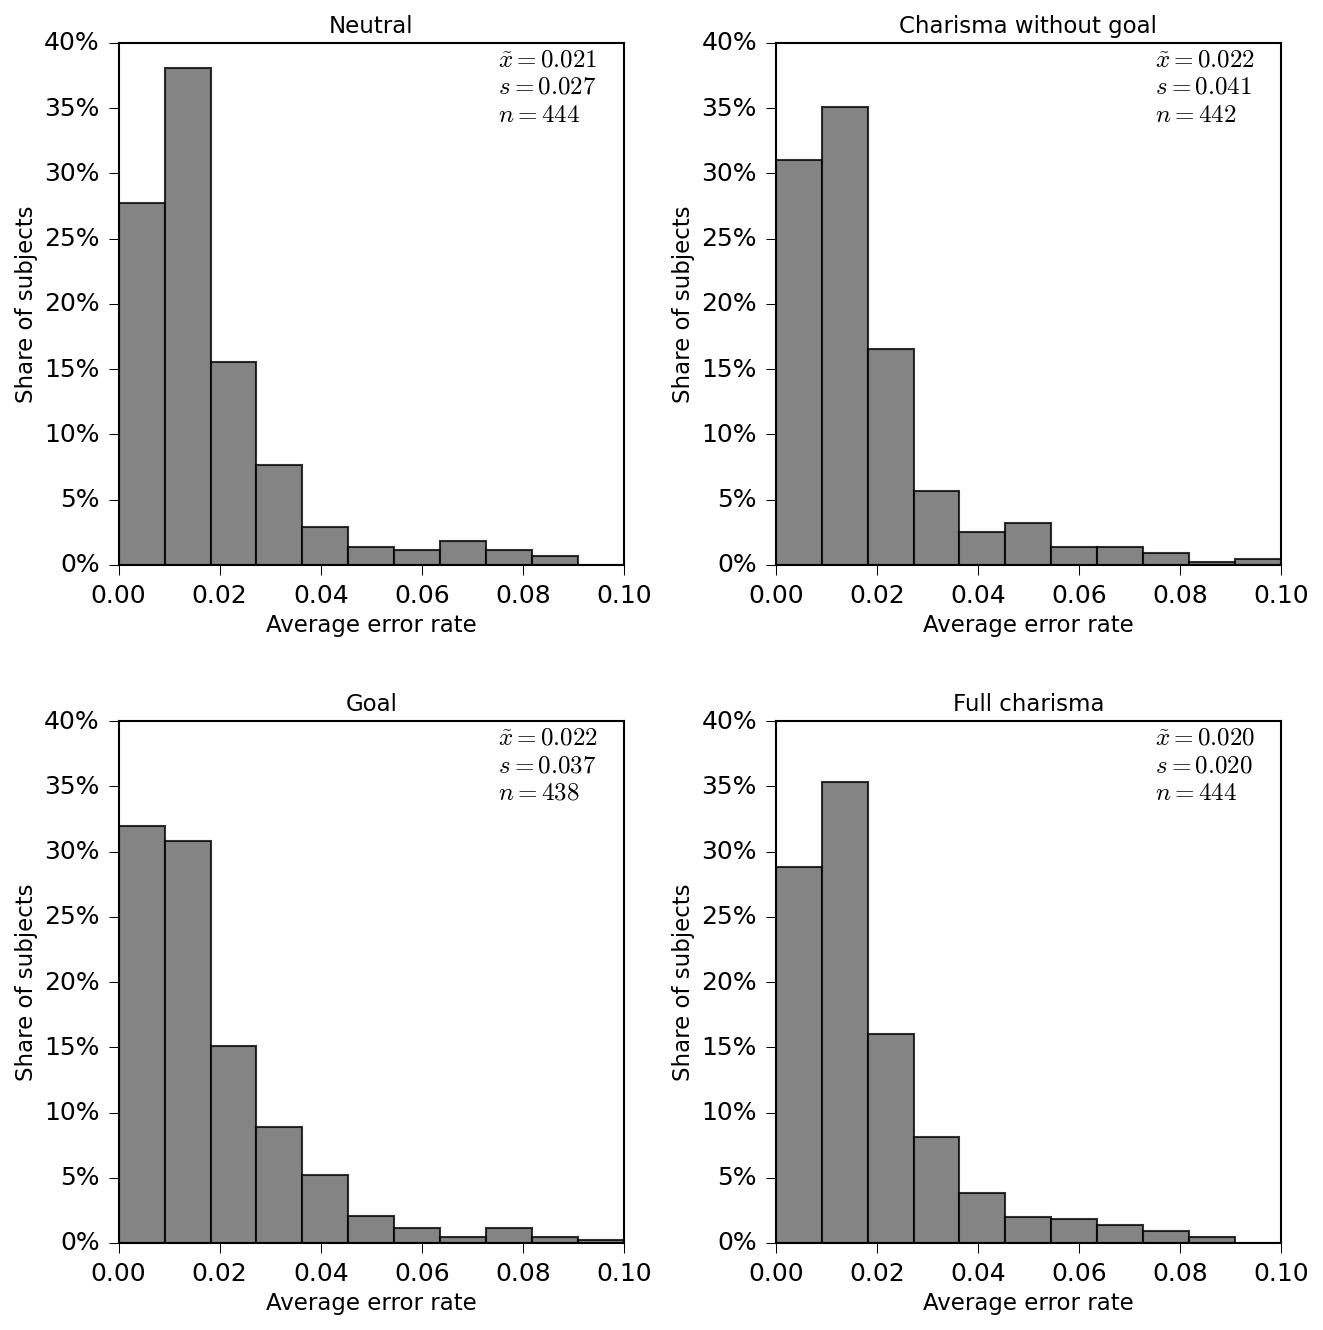

In [12]:
hist_params = dict(bins=11, range=(0, 0.1), color='0.4', alpha=0.8, grid=False)
fig, _ = plt.subplots(2, 2, figsize=(10, 10), dpi=150, facecolor='w')
fig.subplots_adjust(hspace=0.3, wspace=0.3)
for i, ax in enumerate(fig.axes):     
    df_hist = df[df['Treatment_str'] == treat_index[i]]['Avg_edit_ratio']
    df_hist.hist(ax=ax, weights=np.ones(len(df_hist)) / len(df_hist), **hist_params)
    ax.set_title(treat_index[i], **font_kw)
    ax.tick_params(**tick_kw)
    ax.set_ylim(0, 0.4)
    ax.yaxis.set_major_formatter(FuncFormatter('{:.0%}'.format))
    ax.set_xlabel("Average error rate", **xlab_kw)
    ax.set_ylabel("Share of subjects", **ylab_kw)
    mean, std, count = df_hist.mean(), df_hist.std(), df_hist.count()
    ax.text(0.075, 0.34 , f'$\~{{x}}={mean:.3f}$\n$s={std:.3f}$\n$n={count:.0f}$')

path = os.path.join(FIGURES_FOLDER, 'experiment_2', 'edit_ratio_hist_2.pdf')    
plt.savefig(path, bbox_inches='tight')

#### Treatment effects on quality using pooled OLS <a id='quality_ols'></a> 

In [13]:
regs = {}
regs['reg2'] = 'Avg_edit_ratio ~ Goal + Charisma'
regs['reg3'] = 'Avg_edit_ratio ~ Charisma * Goal'
regs['reg4'] = regs['reg3'] + ' + Age + Female + Diverse + Education + Mobile_device'
regs['reg5'] = regs['reg4'] + ' + C(Group)'

ols_results = [smf.ols(formula=v, data=df).fit(cov_type='HC1') for v in regs.values()]

order = [
    'Goal',
    'Charisma',
    'Charisma:Goal',
    'Age',
    'Female',
    'Diverse',
    'Education',
    'Mobile_device',
    'Intercept',
]

auxiliary = {
    'N': lambda x: f'{x.nobs:.0f}',
    'R2': lambda x: f'{x.rsquared:.3f}', 
    'F': lambda x: f'{x.fvalue:.3f}', 
    'P(>F)': lambda x: f'{x.f_pvalue:.3f}',
}

ols_qual = summary_col(
    ols_results,
    stars=True,
    info_dict=auxiliary,
    float_format='%.3f',
    regressor_order=order,
    drop_omitted=True
)

ols_qual = ols_qual\
    .tables[0]\
    .rename(mapper=lambda x: x.replace('_', ' ').replace(':', ' * '), axis=0)\
    .rename(mapper=lambda x: x.split()[0].replace('_', ' '), axis=1)\
    .rename({'Intercept': 'Constant'})\
    .rename_axis('Dependent variable:', axis=1)\
    
ols_qual.loc['Groups'] = pd.Series(3*['No'] + 1*['Yes'], index=ols_qual.columns)

path = os.path.join(
    TABLES_FOLDER,
    'experiment_2',
    'ols_quality.tex'
) 

ols_qual.to_latex(
    path,
    bold_rows=True, 
    float_format="%.3f"
)
    
display(ols_qual)

Dependent variable:,Avg edit ratio,Avg edit ratio,Avg edit ratio,Avg edit ratio
Goal,-0.000,0.001,0.000,0.001
,(0.002),(0.002),(0.002),(0.002)
Charisma,-0.001,0.001,0.001,0.001
,(0.002),(0.002),(0.002),(0.002)
Charisma * Goal,,-0.003,-0.003,-0.003
,,(0.003),(0.003),(0.003)
Age,,,-0.000,-0.000
,,,(0.000),(0.000)
Female,,,-0.006***,-0.005***
,,,(0.002),(0.001)


#### Convert to html

In [14]:
!jupyter nbconvert --output-dir='./docs' --to html 5_treatment_effects_quality.ipynb

[NbConvertApp] Converting notebook 5_treatment_effects_quality.ipynb to html
[NbConvertApp] Writing 892097 bytes to docs/5_treatment_effects_quality.html
